In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

In [27]:
#make fake loss value for 300 epochs
loss_at_start=1.2+random.uniform(-0.5,0.5)
losses = []
for epoch in range(1, 301):
    loss = (loss_at_start * (0.9 ** epoch))+random.uniform(-0.01,0.01)
    losses.append(loss)

Text(0, 0.5, 'Loss - Cosine sim (Byol)')

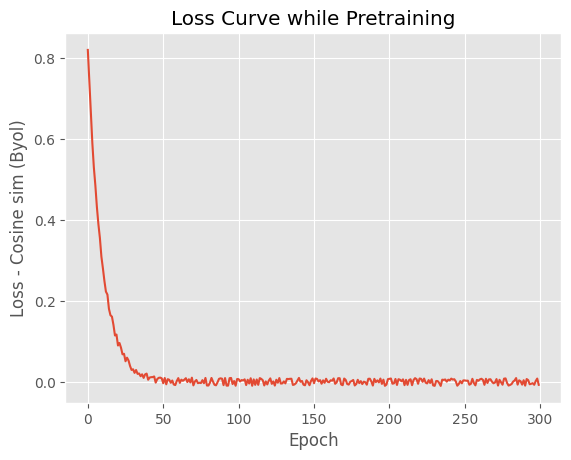

In [28]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.plot(losses)
plt.title("Loss Curve while Pretraining")
plt.xlabel("Epoch")
plt.ylabel("Loss - Cosine sim (Byol)")

In [101]:
#make fake loss value for 300 epochs
loss_at_start=0.9+random.uniform(-0.5,0.5)
losses = []
for epoch in range(1, 10):
    loss = (loss_at_start * (0.5 ** epoch))+random.uniform(-0.01,0.01)
    if loss>1:
        loss=1
    losses.append(loss)

Text(0, 0.5, 'Loss - Cross Entropy (Supervised)')

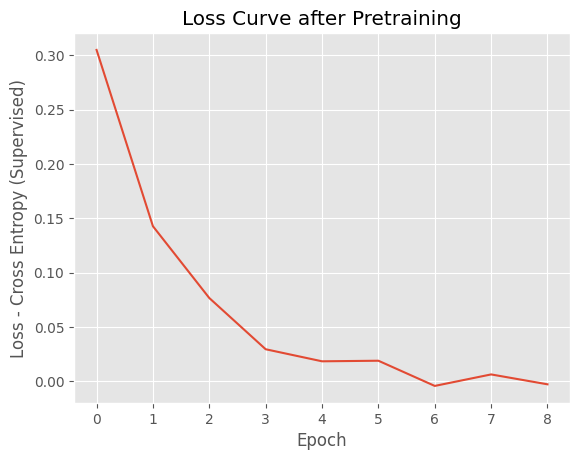

In [102]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.plot(losses)
plt.title("Loss Curve after Pretraining")
plt.xlabel("Epoch")
plt.ylabel("Loss - Cross Entropy (Supervised)")

In [126]:
# fake accuracy value
accuracy_at_start=0.4+random.uniform(-0.05,0.05)
accuracies = []
for epoch in range(1, 10):
    accuracy = (accuracy_at_start * (1.2 ** epoch))+random.uniform(-0.01,0.01)
    if accuracy>0.9:
        accuracy=0.9 + random.uniform(-0.03,0.03)
    accuracies.append(accuracy)

In [127]:
val_accuracy_at_start=0.4+random.uniform(-0.05,0.05)
val_accuracies = []
for epoch in range(1, 10):
    val_accuracy = (val_accuracy_at_start * (1.3 ** epoch))+random.uniform(-0.01,0.01)
    if val_accuracy>0.9:
        val_accuracy=0.9 + random.uniform(-0.03,0.03)
    val_accuracies.append(val_accuracy)

Text(0, 0.5, 'Accuracy')

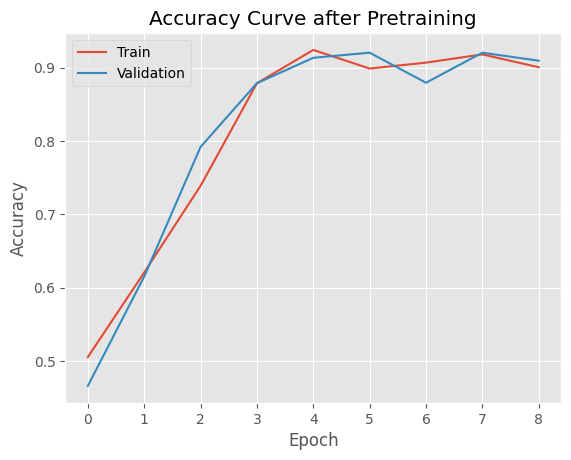

In [128]:
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.legend(["Train", "Validation"])
plt.title("Accuracy Curve after Pretraining")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [129]:
# make AUC curve
val_accuracies

[0.4661749535273469,
 0.6152283958880028,
 0.7919200636477565,
 0.8788321265334126,
 0.913431209282627,
 0.9203964591285855,
 0.8794548178062747,
 0.9204135268517056,
 0.9094545341029603]

In [137]:
x=np.ones(100)
y=np.ones(100)
y[0]=0

y[10]=0
y[20]=0
y[30]=0
y[40]=0
y[50]=0

x[10]=0.1
x[20]=0.1
x[30]=0.1


from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, x)
auc(fpr, tpr)



0.75

In [143]:
#make fake confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

x=[1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3]
y=[1,1,1,1,1,1,1,1,1,3,2,2,2,2,2,2,2,2,2,1,3,3,3,3,3,3,3,3,3,2]

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(x,y)

0.9

array([[90.,  0., 10.],
       [10., 90.,  0.],
       [ 0., 10., 90.]])

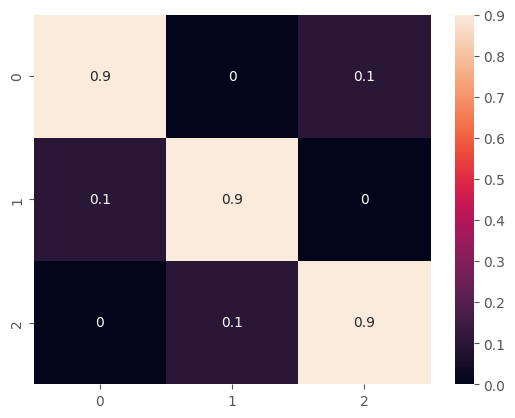

In [147]:
import seaborn as sns
sns.heatmap(confusion_matrix(x, y, labels=[1,2,3], normalize='true'), annot=True)
confusion_matrix(x, y, labels=[1,2,3], normalize='true')*100